<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_012_test_for_multiple_groups_ANOVA_Kruskall_Wallis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction to Tests for Multiple Groups**


This notebook focuses on statistical methods for comparing means across **three or more independent groups**. These tests are essential for determining whether group means differ significantly and identifying where those differences exist. By applying both parametric and non-parametric methods, this notebook demonstrates robust approaches to analyzing data with varying assumptions.

---

#### **What You’ll Learn**
1. **One-Way ANOVA**:
   - A parametric test to determine if the means of three or more independent groups are equal.
   - Assumes normality and homogeneity of variances.
   - Useful for experiments or datasets with continuous dependent variables.

2. **Post-Hoc Analysis (Tukey’s HSD)**:
   - Identifies which groups differ significantly after ANOVA detects a difference.

3. **Kruskal-Wallis Test**:
   - A non-parametric alternative to ANOVA, suitable for data that violates normality or homogeneity assumptions.
   - Tests whether the medians of three or more groups are significantly different.

---

#### **Key Concepts**
- **Null Hypothesis (\(H_0\))**:
  - For both ANOVA and Kruskal-Wallis: All group means (or medians) are equal.
- **Alternative Hypothesis (\(H_1\))**:
  - At least one group mean (or median) is significantly different.
- **Post-Hoc Tests**:
  - Necessary when the null hypothesis is rejected to identify specific group differences.

---

#### **Applications**
- Comparing test scores across multiple schools.
- Evaluating effectiveness of treatments in clinical trials with multiple groups.
- Analyzing customer satisfaction ratings across different service locations.



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
# iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## One-Way ANOVA

### **Question**  
Do the means of `sepal length` differ significantly between `setosa`, `versicolor`, and `virginica`?

---

### **One-Way ANOVA**  
- **Null Hypothesis (\(H_0\))**: The means of `sepal length` are equal across `setosa`, `versicolor`, and `virginica`.  
- **Alternative Hypothesis (\(H_1\))**: At least one group mean of `sepal length` is significantly different.  

---

### **Analysis and Interpretation**  
- The boxplot shows noticeable differences in the central tendencies of `sepal length` across the three species.  
- The test statistic (\(119.26\)) indicates a strong difference in means between at least one pair of groups.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that at least one group mean of `sepal length` differs significantly between the three species.  

---

### **Next Step: Tukey’s HSD**  
Since the ANOVA test indicates significant differences, we should perform a **Tukey’s HSD post-hoc test** to identify which specific groups differ.

One-Way ANOVA Test:
Test Statistic: 119.26
P-Value: 0.0000
Conclusion: Reject the null hypothesis. At least one group mean is significantly different.




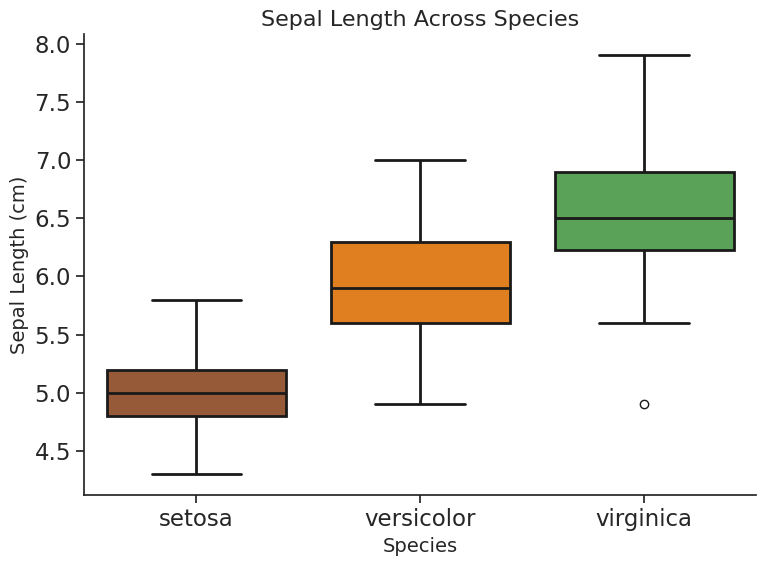

In [ ]:
from scipy.stats import f_oneway

# Set Seaborn theme, style, and palette
sns.set_theme(style="ticks", palette="Pastel1_r")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Extract sepal length data for each species
setosa_sepal_length = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal_length = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica_sepal_length = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

# Perform One-Way ANOVA
stat, p_value = f_oneway(setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length)

# Output results
print("One-Way ANOVA Test:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. At least one group mean is significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in group means.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df, x='species', y='sepal length (cm)', hue='species', palette="Set1_r", linewidth=2, linecolor='k')
plt.title("Sepal Length Across Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Sepal Length (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


### **What Does "One-Way" Mean in One-Way ANOVA?**

The term "one-way" in **One-Way ANOVA** refers to the fact that the test examines the impact of **one independent variable (factor)** on a **dependent variable**.

---

### **Key Concepts**
1. **Independent Variable (Factor)**:
   - In a one-way ANOVA, there is **only one independent variable** with multiple levels (groups or categories).
   - Example: In the Iris dataset, the independent variable is `species` with three levels: `setosa`, `versicolor`, and `virginica`.

2. **Dependent Variable**:
   - The dependent variable is the continuous variable whose means are being compared across the levels of the independent variable.
   - Example: The dependent variable in our test is `sepal length`.

3. **Purpose**:
   - To determine whether the means of the dependent variable differ significantly across the levels of the independent variable.
   - Example: Does `sepal length` differ across the three species?

---

### **Why "One-Way"?**
The "one-way" distinguishes it from **two-way ANOVA**, where there are **two independent variables**.  
- **One-Way ANOVA**: Examines the effect of one factor (e.g., species) on one dependent variable (e.g., sepal length).  
- **Two-Way ANOVA**: Examines the interaction of two factors (e.g., species and treatment type) on one dependent variable.

---

### **Example in Context**
- **One-Way ANOVA**:
  - Factor: Species (`setosa`, `versicolor`, `virginica`).
  - Dependent Variable: Sepal Length.
  - Question: Does the species significantly influence the average sepal length?

- **Two-Way ANOVA** (if applied):  
  - Factors: Species and Treatment (e.g., Fertilized vs. Non-Fertilized).  
  - Dependent Variable: Sepal Length.  
  - Question: Does the species, the treatment, or their interaction significantly influence the average sepal length?

---

### **Key Takeaway**
The "one-way" in One-Way ANOVA indicates that the analysis involves **only one independent variable** (factor). This simplicity makes it suitable for straightforward group comparisons, as we’ve done with the Iris dataset.  


### **How to Interpret Tukey’s HSD Results**

Tukey’s HSD (Honestly Significant Difference) test compares the means of every pair of groups and determines whether the differences are statistically significant. Here’s how to interpret the key components of the output:

---

### **Output Explanation**
1. **Group1 and Group2**:
   - The two groups being compared.
   - Example: `setosa` vs. `versicolor`.

2. **Meandiff**:
   - The difference between the means of the two groups.
   - Example: For `setosa` vs. `versicolor`, the mean difference in `sepal length` is \(0.93\).

3. **P-Adj**:
   - The adjusted p-value for the comparison.
   - A small p-value (typically \(< 0.05\)) indicates that the difference in means is statistically significant after correcting for multiple comparisons.
   - Example: For all comparisons, \(p \text{-adj} = 0.0\), meaning all differences are highly significant.

4. **Lower and Upper**:
   - The confidence interval (CI) for the mean difference.
   - If the interval does not include \(0\), the difference is statistically significant.
   - Example: For `setosa` vs. `versicolor`, the CI is \([0.6862, 1.1738]\), which does not include \(0\), confirming significance.

5. **Reject**:
   - Indicates whether the null hypothesis (no difference between the group means) is rejected.
   - `True`: The difference is significant.
   - `False`: The difference is not significant.
   - Example: All comparisons (`setosa` vs. `versicolor`, `setosa` vs. `virginica`, `versicolor` vs. `virginica`) have `reject = True`, so all are significantly different.

---

### **Interpretation of Results**
1. **`setosa` vs. `versicolor`**:
   - Mean Difference: \(0.93\)
   - Adjusted p-value: \(0.0\) (significant).
   - Confidence Interval: \([0.6862, 1.1738]\) (does not include \(0\)).
   - Conclusion: The `sepal length` of `setosa` and `versicolor` are significantly different.

2. **`setosa` vs. `virginica`**:
   - Mean Difference: \(1.582\)
   - Adjusted p-value: \(0.0\) (significant).
   - Confidence Interval: \([1.3382, 1.8258]\) (does not include \(0\)).
   - Conclusion: The `sepal length` of `setosa` and `virginica` are significantly different.

3. **`versicolor` vs. `virginica`**:
   - Mean Difference: \(0.652\)
   - Adjusted p-value: \(0.0\) (significant).
   - Confidence Interval: \([0.4082, 0.8958]\) (does not include \(0\)).
   - Conclusion: The `sepal length` of `versicolor` and `virginica` are significantly different.

---

### **General Summary**
Tukey’s HSD results confirm that all three species (`setosa`, `versicolor`, and `virginica`) have significantly different mean `sepal lengths`. This aligns with the results of the one-way ANOVA.



In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey’s HSD test
tukey = pairwise_tukeyhsd(
    endog=iris_df['sepal length (cm)'],    # Dependent variable
    groups=iris_df['species'],            # Independent variable
    alpha=0.05                            # Significance level
)

# Output results
print(tukey)

# # Visualization of Tukey's HSD
# plt.figure(figsize=(6,4))
# tukey.plot_simultaneous()
# plt.title("Tukey's HSD for Sepal Length Across Species", fontsize=16)
# plt.xlabel("Mean Difference", fontsize=14)
# plt.ylabel("Species", fontsize=14)
# plt.tight_layout()
# plt.show()

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


## **Kruskal-Wallis Test**

### **Question**  
Do the medians of `sepal length` differ significantly between `setosa`, `versicolor`, and `virginica`?

---

### **Kruskal-Wallis Test**  
- **Null Hypothesis (\(H_0\))**: The medians of `sepal length` are equal across `setosa`, `versicolor`, and `virginica`.  
- **Alternative Hypothesis (\(H_1\))**: At least one group median of `sepal length` is significantly different.  

---

### **Analysis and Interpretation**  
- The boxplot illustrates noticeable differences in the central tendencies (medians) of `sepal length` across the three species.  
- The test statistic (\(96.94\)) indicates a strong deviation in medians between at least one pair of groups.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that at least one group median of `sepal length` differs significantly between the three species.  

---

### **Comparison to One-Way ANOVA**
- Both tests indicate significant differences between groups, but:
  - **One-Way ANOVA** assumes normality and equal variances, testing differences in means.  
  - **Kruskal-Wallis Test** is non-parametric, focusing on differences in medians, and is more robust to deviations from normality.  



Kruskal-Wallis Test:
Test Statistic: 96.94
P-Value: 0.0000
Conclusion: Reject the null hypothesis. At least one group median is significantly different.




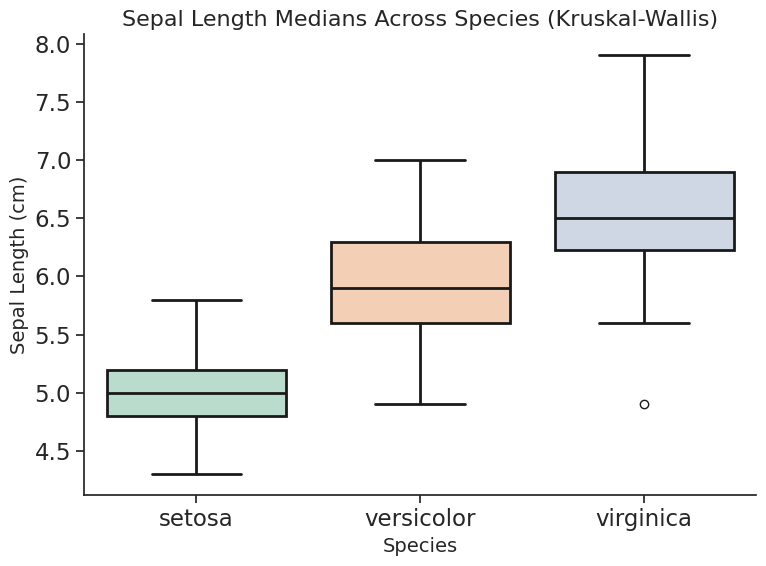

In [ ]:
from scipy.stats import kruskal

# Extract sepal length data for each species
setosa_sepal_length = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal_length = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica_sepal_length = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

# Perform Kruskal-Wallis Test
stat, p_value = kruskal(setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length)

# Output results
print("Kruskal-Wallis Test:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. At least one group median is significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in group medians.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df, x='species', y='sepal length (cm)', hue='species', palette="Pastel2", linewidth=2, linecolor='k')
plt.title("Sepal Length Medians Across Species (Kruskal-Wallis)", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Sepal Length (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
# !pip install scikit-posthocs

### **Interpreting Dunn’s Test Results**

Dunn’s test results compare the medians of each pair of groups and adjust the p-values using the Bonferroni correction to account for multiple comparisons. Here’s how to interpret the key components of the output:

---

### **Matrix Explanation**
- The matrix shows the **adjusted p-values** for each pairwise comparison of species (`setosa`, `versicolor`, `virginica`).
- Each value indicates whether the median `sepal length` of one group is significantly different from another group’s median.

---

### **Step-by-Step Interpretation**
1. **Diagonal Values**:
   - Values on the diagonal (e.g., `setosa vs. setosa`) are \(1.0\), as groups compared to themselves have no difference.

2. **Off-Diagonal Values**:
   - These represent the adjusted p-values for pairwise comparisons.
   - Compare these values to your significance level (\(\alpha = 0.05\)) to determine if the difference is statistically significant.
   - Example:
     - `setosa vs. versicolor`: \(p = 3.058513 \times 10^{-9}\), which is much smaller than \(0.05\), indicating a significant difference.

3. **Key Results**:
   - **`setosa` vs. `versicolor`**: \(p = 3.058513 \times 10^{-9}\) (significant).
   - **`setosa` vs. `virginica`**: \(p = 6.000296 \times 10^{-22}\) (significant).
   - **`versicolor` vs. `virginica`**: \(p = 8.324597 \times 10^{-4}\) (significant).

---

### **Conclusion**
- All pairwise comparisons are statistically significant (\(p < 0.05\)).
- This confirms that the medians of `sepal length` are significantly different between `setosa`, `versicolor`, and `virginica`.

---

### **Key Takeaways**
Dunn’s test aligns with the results of both the Kruskal-Wallis test and ANOVA. The medians of `sepal length` differ significantly between all three species, reinforcing the conclusion that species plays a significant role in determining `sepal length`.

Would you like to analyze another feature, try a different post-hoc test, or move on to the next section of the notebook? Let me know!

Dunn's Test Pairwise Comparisons:
                  setosa    versicolor     virginica
setosa      1.000000e+00  3.058513e-09  6.000296e-22
versicolor  3.058513e-09  1.000000e+00  8.324597e-04
virginica   6.000296e-22  8.324597e-04  1.000000e+00




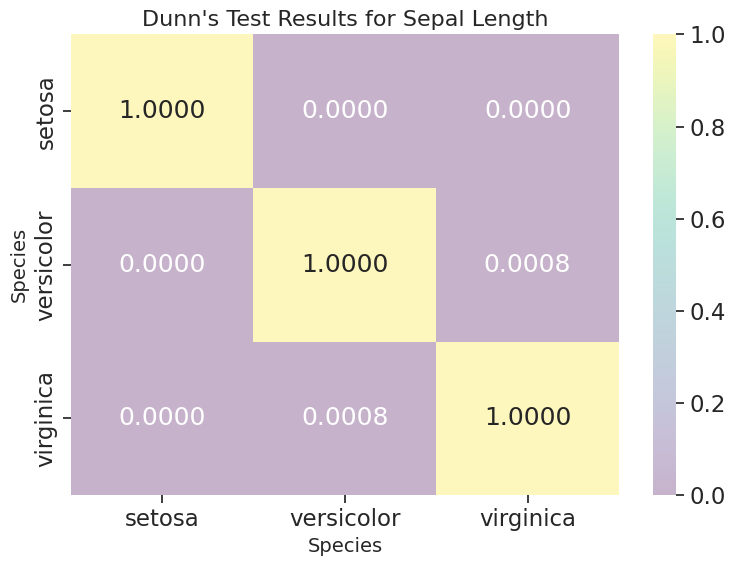

In [ ]:
from scikit_posthocs import posthoc_dunn

# Perform Dunn’s Test with Bonferroni correction
dunn_results = posthoc_dunn(
    iris_df,
    val_col='sepal length (cm)',  # Dependent variable
    group_col='species',         # Independent variable
    p_adjust='bonferroni'        # Correction for multiple comparisons
)

# Output results
print("Dunn's Test Pairwise Comparisons:")
print(dunn_results)
print('\n')

# Heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(dunn_results, annot=True, fmt=".4f", cmap="viridis", alpha=0.3,cbar=True)
plt.title("Dunn's Test Results for Sepal Length", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Species", fontsize=14)
plt.tight_layout()
plt.show()


### **Main Differences Between ANOVA and Kruskal-Wallis**

| **Feature**              | **ANOVA**                                   | **Kruskal-Wallis Test**                     |
|--------------------------|---------------------------------------------|---------------------------------------------|
| **Type of Test**         | Parametric                                 | Non-Parametric                              |
| **What It Compares**     | Means of groups                            | Medians of groups                           |
| **Assumptions**          | Assumes normality and homogeneity of variances. | No assumptions about the data distribution. |
| **Data Type**            | Continuous, normally distributed data.     | Ordinal, non-normal, or ranked data.        |
| **Robustness**           | Sensitive to violations of assumptions.    | Robust to outliers and non-normality.       |
| **Effectiveness**        | More powerful if assumptions are met.      | Useful when assumptions of ANOVA are violated. |
| **Follow-Up Tests**      | Tukey’s HSD for post-hoc analysis.          | Dunn’s Test for post-hoc analysis.          |

---

### **When to Use One Over the Other**

#### **Use ANOVA When**:
1. **Data Meets Assumptions**:
   - The data is **normally distributed** within each group.
   - Variances across groups are **approximately equal** (homogeneity of variances).
2. **Analyzing Means**:
   - The primary interest is comparing the **means** of groups.
3. **More Power**:
   - ANOVA is generally more statistically powerful than non-parametric tests when assumptions are satisfied, meaning it’s better at detecting true differences.

#### **Use Kruskal-Wallis When**:
1. **Data Violates ANOVA Assumptions**:
   - Data is **not normally distributed** or has significant outliers.
   - Variances are **unequal** between groups.
2. **Analyzing Medians**:
   - The focus is on comparing the **medians** of groups rather than means.
3. **Data is Ordinal or Ranked**:
   - Data can be ordinal, or values may naturally be represented as ranks rather than continuous variables.

---

### **Practical Example**
- **ANOVA**: Comparing test scores (continuous, normally distributed) across three classes.  
- **Kruskal-Wallis**: Comparing customer satisfaction ratings (ordinal data) across three service locations.

---

### **Key Takeaway**
- Use **ANOVA** when assumptions of normality and equal variances are met, as it is more precise and powerful.
- Use **Kruskal-Wallis** when assumptions are violated or when dealing with ordinal or ranked data.  



### **Question**  
Do the means of `petal width` differ significantly between `setosa`, `versicolor`, and `virginica`?

---

### **One-Way ANOVA**  
- **Null Hypothesis (\(H_0\))**: The means of `petal width` are equal across `setosa`, `versicolor`, and `virginica`.  
- **Alternative Hypothesis (\(H_1\))**: At least one group mean of `petal width` is significantly different.  

---

### **Analysis and Interpretation**  
- The boxplot shows distinct differences in the central tendencies of `petal width` across the three species.  
- The test statistic (\(960.01\)) is very large, indicating a significant difference in means between at least one pair of groups.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that at least one group mean of `petal width` differs significantly between `setosa`, `versicolor`, and `virginica`.  



One-Way ANOVA Test:
Test Statistic: 960.01
P-Value: 0.0000
Conclusion: Reject the null hypothesis. At least one group mean is significantly different.




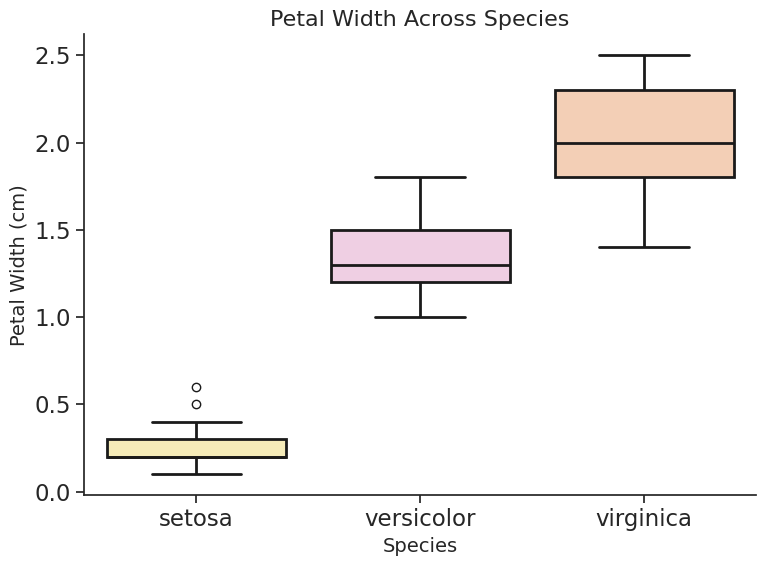

In [ ]:
from scipy.stats import f_oneway

# Extract petal width data for each species
setosa_petal_width = iris_df[iris_df['species'] == 'setosa']['petal width (cm)']
versicolor_petal_width = iris_df[iris_df['species'] == 'versicolor']['petal width (cm)']
virginica_petal_width = iris_df[iris_df['species'] == 'virginica']['petal width (cm)']

# Perform One-Way ANOVA
stat, p_value = f_oneway(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

# Output results
print("One-Way ANOVA Test:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. At least one group mean is significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in group means.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df, x='species', y='petal width (cm)', hue='species', palette="Pastel2_r", linewidth=2, linecolor='k')
plt.title("Petal Width Across Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Petal Width (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


### **Question**  
Do the medians of `petal width` differ significantly between `setosa`, `versicolor`, and `virginica`?

---

### **Kruskal-Wallis Test**  
- **Null Hypothesis (\(H_0\))**: The medians of `petal width` are equal across `setosa`, `versicolor`, and `virginica`.  
- **Alternative Hypothesis (\(H_1\))**: At least one group median of `petal width` is significantly different.  

---

### **Analysis and Interpretation**  
- The boxplot shows distinct differences in the central tendencies (medians) of `petal width` across the three species.  
- The test statistic (\(131.19\)) indicates a substantial difference in medians between at least one pair of groups.  
- The p-value (\(< 0.0001\)) is far below the significance level (\(\alpha = 0.05\)), providing strong evidence to reject the null hypothesis.  

---

### **Conclusion**  
The statistical test and visualization indicate that at least one group median of `petal width` differs significantly between `setosa`, `versicolor`, and `virginica`.  

---

### **Comparison to One-Way ANOVA**
- Both tests indicate significant differences between groups, but:
  - **One-Way ANOVA** tests differences in means and assumes normality and equal variances.
  - **Kruskal-Wallis Test** is non-parametric, focusing on differences in medians and robust to non-normality.



Kruskal-Wallis Test:
Test Statistic: 131.19
P-Value: 0.0000
Conclusion: Reject the null hypothesis. At least one group median is significantly different.




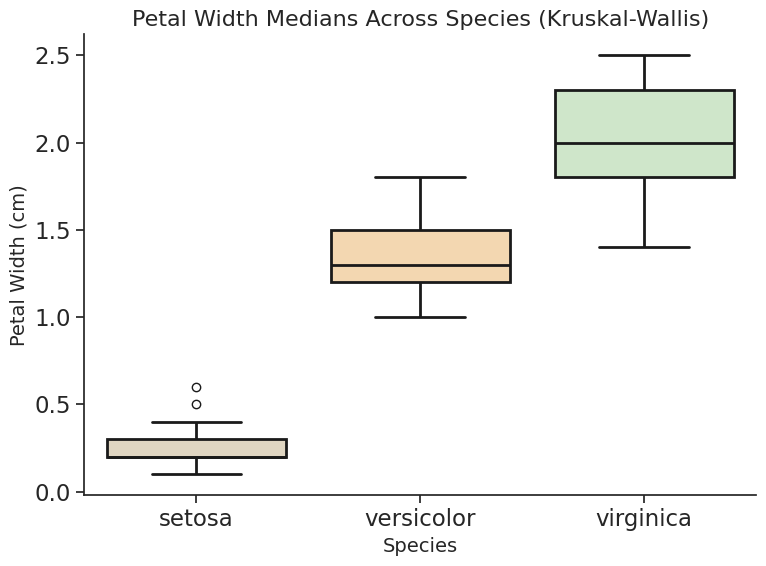

In [ ]:
from scipy.stats import kruskal

# Extract petal width data for each species
setosa_petal_width = iris_df[iris_df['species'] == 'setosa']['petal width (cm)']
versicolor_petal_width = iris_df[iris_df['species'] == 'versicolor']['petal width (cm)']
virginica_petal_width = iris_df[iris_df['species'] == 'virginica']['petal width (cm)']

# Perform Kruskal-Wallis Test
stat, p_value = kruskal(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

# Output results
print("Kruskal-Wallis Test:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. At least one group median is significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in group medians.")
print('\n')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df, x='species', y='petal width (cm)', hue='species', palette="Pastel1_r", linewidth=2, linecolor='k')
plt.title("Petal Width Medians Across Species (Kruskal-Wallis)", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Petal Width (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


While the **Kruskal-Wallis Test** is more flexible and less restrictive than **ANOVA**, it is not always the best "go-to" test. The decision to use ANOVA or Kruskal-Wallis depends on your data, your assumptions, and what you want to compare.

---

### **Why Not Always Use Kruskal-Wallis Instead of ANOVA?**

#### **1. Efficiency and Power**
- **ANOVA** is more **statistically powerful** when its assumptions (normality and equal variances) are met. This means it is better at detecting true differences between groups when the data is normally distributed.
- **Kruskal-Wallis**, as a rank-based test, uses less information about the data (only ranks, not the actual values), so it is generally less powerful than ANOVA when the assumptions of ANOVA are valid.

---

#### **2. What You’re Comparing**
- **ANOVA** compares **means**:
  - Use ANOVA when differences in group means are meaningful to your analysis or hypothesis.
- **Kruskal-Wallis** compares **medians**:
  - Use Kruskal-Wallis when the data is not normally distributed or when outliers may skew the means.

---

#### **3. Robustness**
- **Kruskal-Wallis** is more robust to:
  - Non-normal data distributions.
  - Unequal variances between groups.
- However, ANOVA is more robust than many think, especially when sample sizes are large or group sizes are equal, even if assumptions are slightly violated.

---

### **When to Use Each Test**
| **Scenario**                        | **Use ANOVA**                       | **Use Kruskal-Wallis**                |
|-------------------------------------|-------------------------------------|---------------------------------------|
| Data is normally distributed        | ✅                                  | ❌                                    |
| Data has unequal variances          | ❌ (unless corrected with Welch’s ANOVA) | ✅                                    |
| Data is non-normal or skewed        | ❌                                  | ✅                                    |
| Comparing group **means** is important | ✅                                  | ❌                                    |
| Comparing group **medians** is important | ❌                                  | ✅                                    |
| Small sample sizes                  | ❌                                  | ✅                                    |
| Data has outliers                   | ❌ (unless transformed or winsorized) | ✅                                    |

---

### **Key Takeaway**
- **Default to ANOVA** when:
  - You expect the data to meet the assumptions or are willing to test and correct for violations (e.g., use Welch’s ANOVA for unequal variances).
  - You want to compare **means**.
- **Use Kruskal-Wallis** when:
  - The data is clearly non-normal or has significant outliers that are difficult to address.
  - You want to compare **medians** or work with ordinal/ranked data.

---

### **Practical Recommendation**
If you are unsure, you can:
1. Check normality (e.g., using the Shapiro-Wilk test) and variances (e.g., Levene’s Test).
2. If the data fails these assumptions, Kruskal-Wallis is a good fallback.
3. If assumptions are met, use ANOVA for its greater statistical power.

Would you like to explore normality tests or proceed to another statistical comparison?